![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

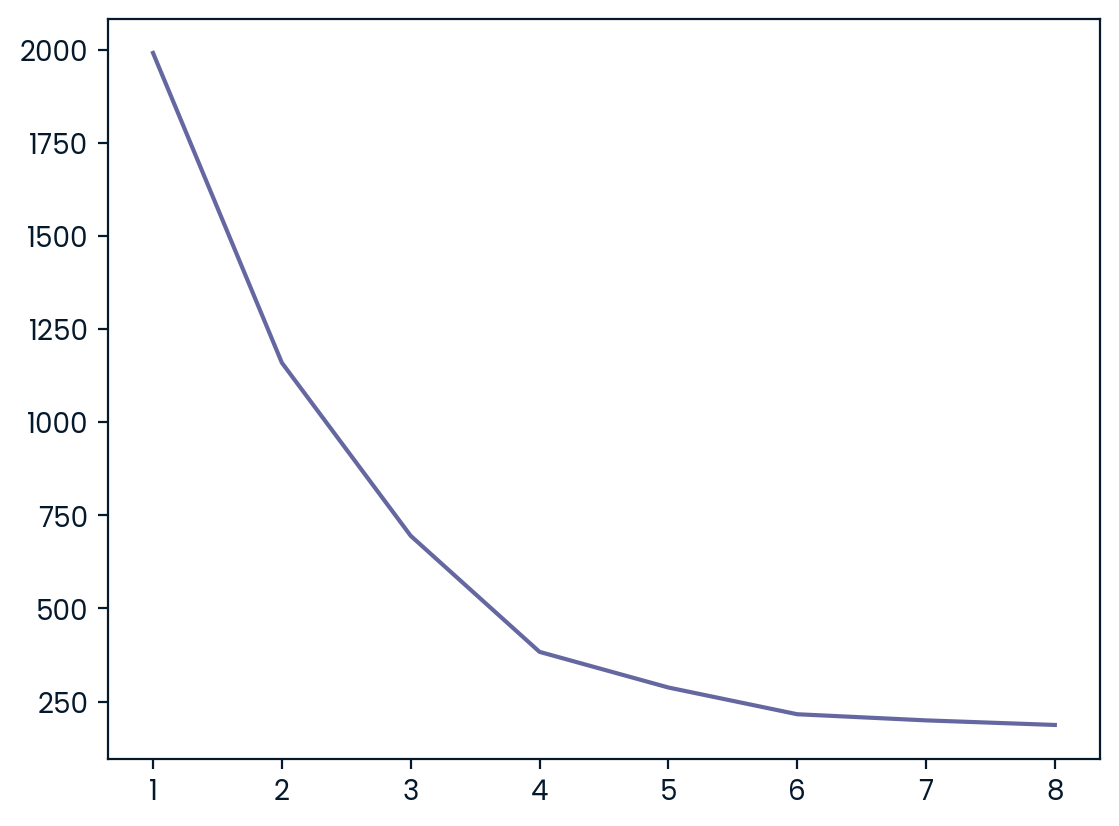

In [15]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()
penguins_df = pd.get_dummies(penguins_df)

scaler = StandardScaler()
X  = scaler.fit_transform(penguins_df)
X_df = pd.DataFrame(X, columns = penguins_df.columns)

# penguins_df.info()
result = []


for i in range(1,9):
    kmean = KMeans(n_clusters= i)
    kmean.fit(X_df)
    score= kmean.inertia_
    result.append(score)

plt.plot(range(1,9), result)    
plt.show()
    
    






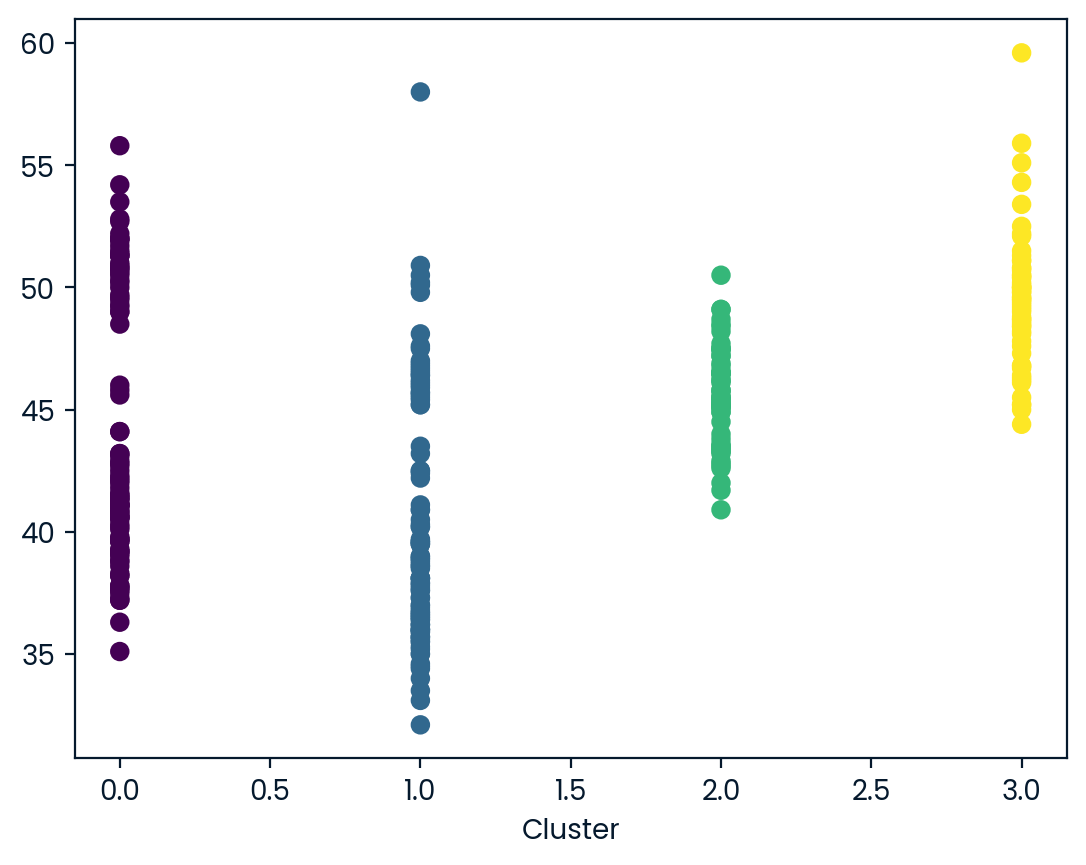

In [16]:
kmen = KMeans(n_clusters= 4 ).fit(X_df)

penguins_df['labels'] = kmen.labels_

plt.scatter(x = penguins_df['labels'] , y = penguins_df['culmen_length_mm'], c = kmen.labels_)
plt.xlabel('Cluster')
plt.show()

# plt.plot(p[''])

In [17]:
# Updated code
stat_penguins = penguins_df.groupby(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'labels']).mean()
stat_penguin= pd.DataFrame(stat_penguins)